Length of Transform: 256


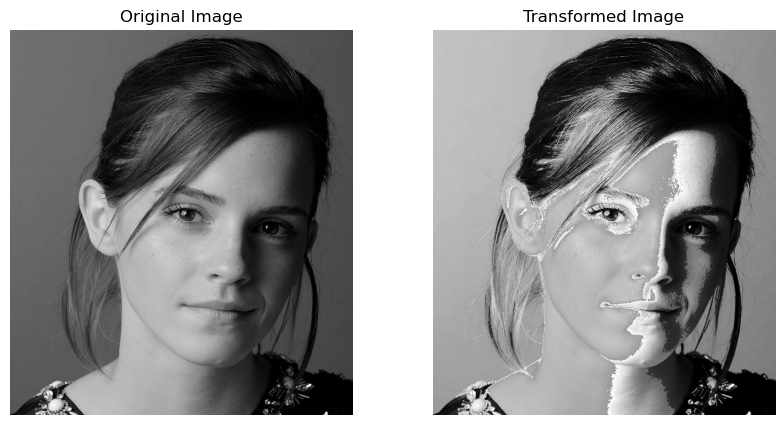

In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the intensity transformation points based on the given function
# 0 to 50 -> 0 to 50, 50 to 150 -> 100 to 255, 150 to 255 -> 150 to 255
c = np.array([(50, 50), (150, 255)])

# Create the intensity transformation segments
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')  # From 0 to 50, output from 0 to 50
t2 = np.linspace(100, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')  # From 51 to 150, output from 100 to 255
t3 = np.linspace(151, 255, 255 - c[1, 0]).astype('uint8')  # From 151 to 255, output from 150 to 255

# Concatenate the segments to form the full transformation array
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(f"Length of Transform: {len(transform)}")

# Load the grayscale image
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Apply the intensity transformation using cv.LUT
image_transformed = cv.LUT(img_orig, transform)

# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.show()


<img src="Brain_White_Grey.png" alt="Optional Title" width="600"/>


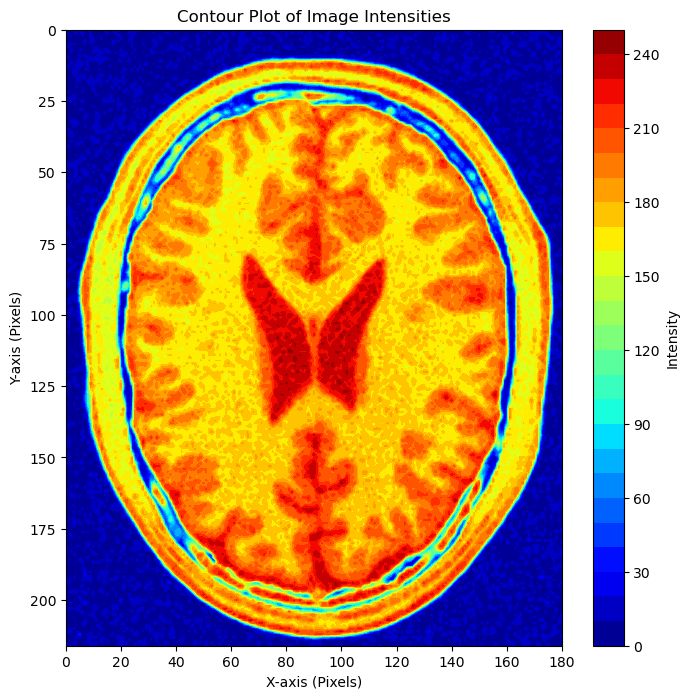

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Display a contour plot with intensity values in increments of 10
def plot_contour_image(img, step=10):
    # Create a meshgrid for the pixel coordinates
    y, x = np.mgrid[0:img.shape[0], 0:img.shape[1]]

    # Define contour levels with increments of 10
    levels = np.arange(0, 255, step)
    
    # Create the contour plot
    plt.figure(figsize=(8, 8))
    contour = plt.contourf(x, y, img, levels=levels, cmap='jet')
    plt.colorbar(contour, label="Intensity")
    
    # Set labels and display
    plt.title("Contour Plot of Image Intensities")
    plt.xlabel("X-axis (Pixels)")
    plt.ylabel("Y-axis (Pixels)")
    plt.gca().invert_yaxis()  # Invert Y-axis to match image coordinates
    plt.show()

# Plot the contour of the brain image with increments of 10
plot_contour_image(img_orig, step=10)


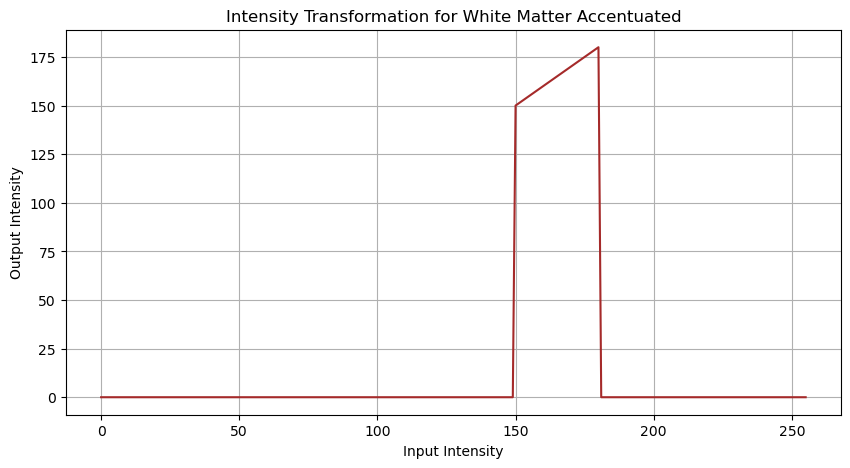

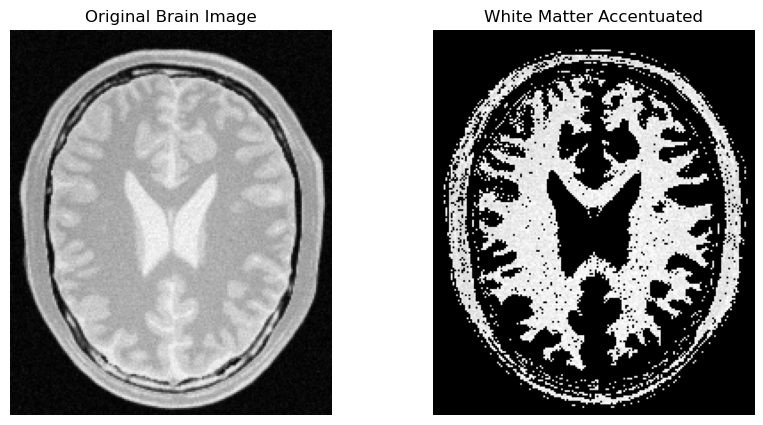

In [75]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Define transformation to accentuate white matter (150-180)
def white_matter_transformation():
    # Mapping intensities:
    # 0-149 -> 0-100
    # 150-179 -> 200-255 (white matter)
    # 180-255 -> 0-100

    # Create intensity transformation segments
    t1 = np.linspace(0, 0, 150).astype('uint8')  # From 0 to 149, mapped to 0-100
    t2 = np.linspace(150, 180, 31).astype('uint8')  # From 150 to 179, mapped to 200-255 (white matter)
    t3 = np.linspace(0, 0, 75).astype('uint8')   # From 180 to 255, mapped to 0-100
    
    # Concatenate the segments to form the full transformation array
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    
    # Verify the length of the transformation array
    assert len(transform) == 256, f"Transformation array size incorrect: {len(transform)}"
    
    return transform

# Apply the transformation
white_transform = white_matter_transformation()

# Apply the intensity transformation using cv.LUT
image_white_matter = cv.LUT(img_orig, white_transform)

# Plot the intensity transformation
input_intensity = np.arange(256)
output_intensity = white_transform

plt.figure(figsize=(10, 5))
plt.plot(input_intensity, output_intensity, color='brown')
plt.title('Intensity Transformation for White Matter Accentuated')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()

# Display the original and white-matter-accentuated images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Brain Image')
ax[0].axis('off')

ax[1].imshow(image_white_matter, cmap='gray')
ax[1].set_title('White Matter Accentuated')
ax[1].axis('off')

plt.show()

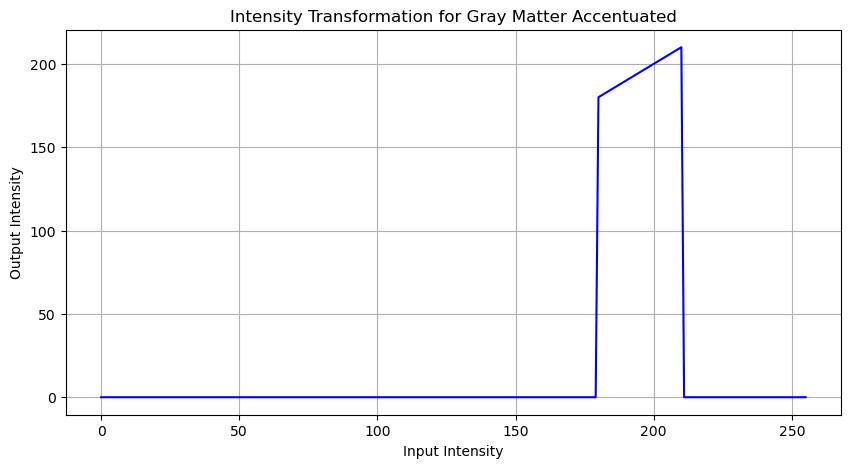

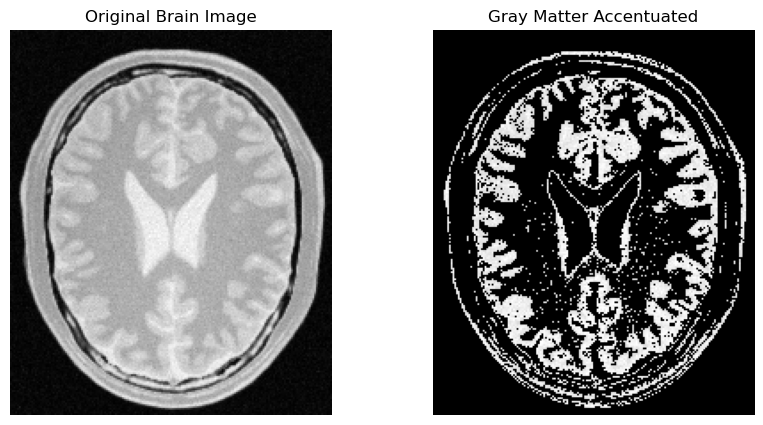

In [73]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Define transformation to accentuate gray matter (180-210)
def gray_matter_transformation():
    # Mapping intensities:
    # 0-179 -> 0-100
    # 180-210 -> 200-255 (gray matter)
    # 211-255 -> 0-100

    # Create intensity transformation segments
    t1 = np.linspace(0, 0, 180).astype('uint8')  # From 0 to 179, mapped to 0-100
    t2 = np.linspace(180, 210, 31).astype('uint8')  # From 180 to 210, mapped to 200-255 (gray matter)
    t3 = np.linspace(0, 0, 45).astype('uint8')   # From 211 to 255, mapped to 0-100
    
    # Concatenate the segments to form the full transformation array
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    
    # Verify the length of the transformation array
    assert len(transform) == 256, f"Transformation array size incorrect: {len(transform)}"
    
    return transform

# Apply the transformation
gray_transform = gray_matter_transformation()

# Apply the intensity transformation using cv.LUT
image_gray_matter = cv.LUT(img_orig, gray_transform)

# Plot the intensity transformation for gray matter
input_intensity = np.arange(256)
output_intensity = gray_transform

plt.figure(figsize=(10, 5))
plt.plot(input_intensity, output_intensity, color='blue')
plt.title('Intensity Transformation for Gray Matter Accentuated')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()

# Display the original and gray-matter-accentuated images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Brain Image')
ax[0].axis('off')

ax[1].imshow(image_gray_matter, cmap='gray')
ax[1].set_title('Gray Matter Accentuated')
ax[1].axis('off')

plt.show()


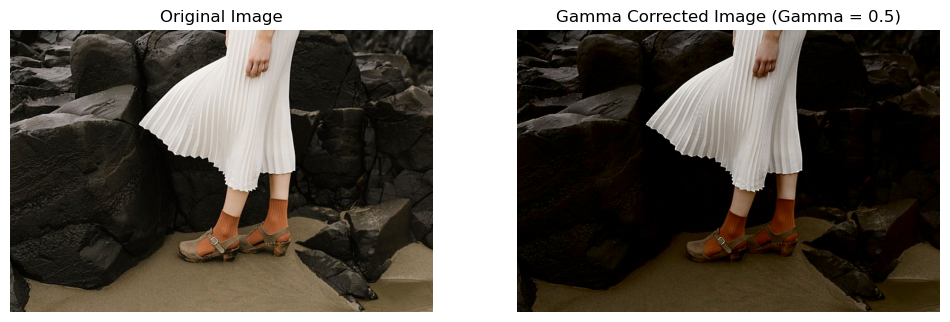

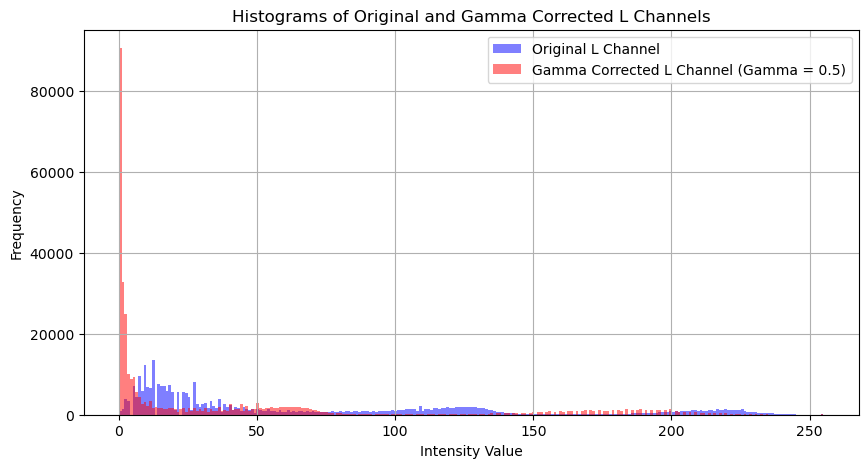

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('highlights_and_shadows.jpg')
assert img is not None, "Error: Image not found!"

# Convert the image from BGR to LAB color space
lab_img = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Split the LAB image into separate channels
L, a, b = cv.split(lab_img)

# Define the gamma correction function
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    # Create a lookup table to apply gamma correction
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Apply gamma correction to the L channel
gamma_value = 0.5  # Example gamma value
L_gamma_corrected = gamma_correction(L, gamma_value)

# Merge the modified L channel with the original a and b channels
lab_img_corrected = cv.merge([L_gamma_corrected, a, b])

# Convert the LAB image back to BGR color space
img_corrected = cv.cvtColor(lab_img_corrected, cv.COLOR_Lab2BGR)

# Display the original and corrected images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Gamma Corrected Image (Gamma = {gamma_value})')
ax[1].axis('off')

plt.show()

# Plot the histograms of the original and gamma-corrected L channels
plt.figure(figsize=(10, 5))
plt.hist(L.ravel(), bins=256, color='blue', alpha=0.5, label='Original L Channel')
plt.hist(L_gamma_corrected.ravel(), bins=256, color='red', alpha=0.5, label=f'Gamma Corrected L Channel (Gamma = {gamma_value})')
plt.title('Histograms of Original and Gamma Corrected L Channels')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


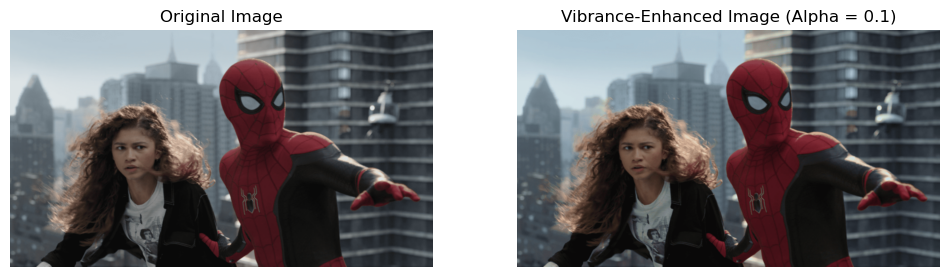

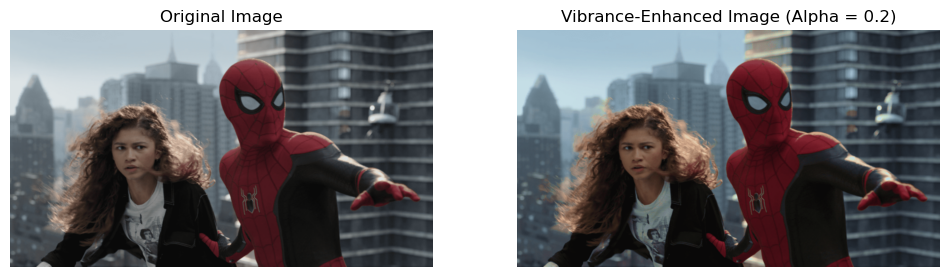

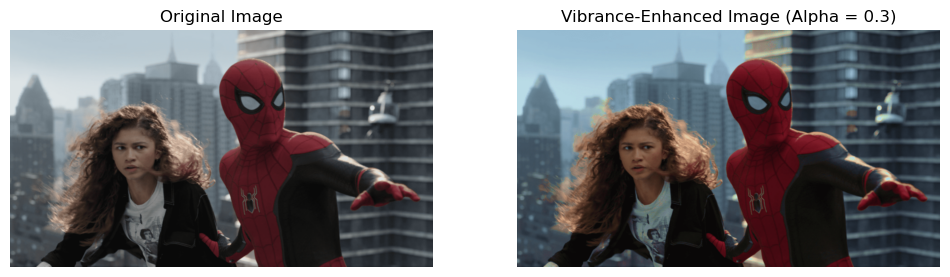

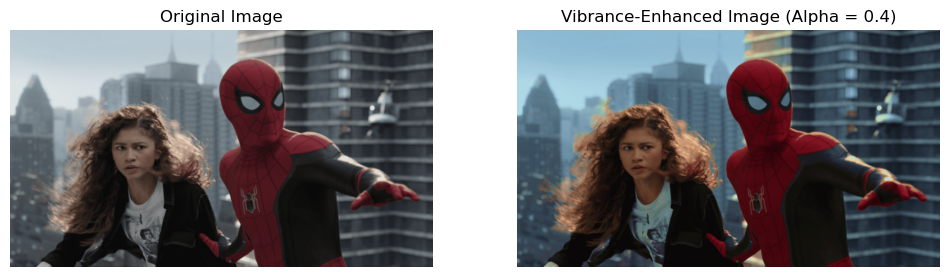

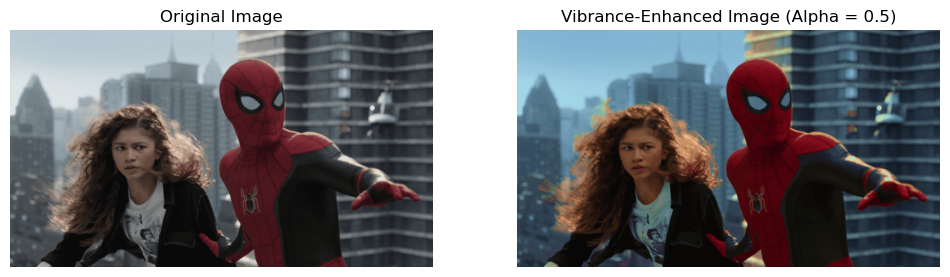

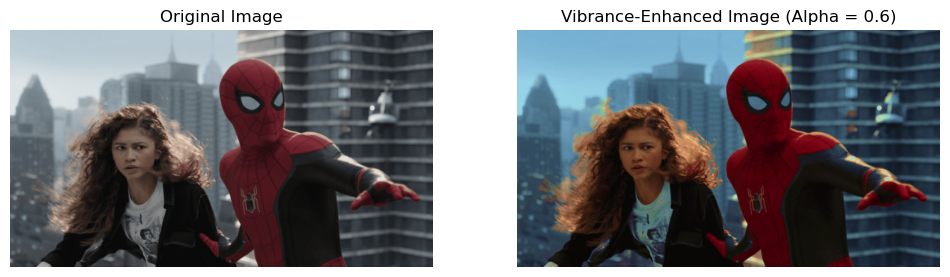

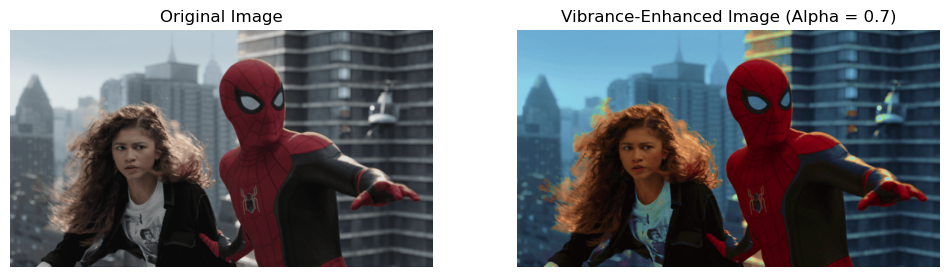

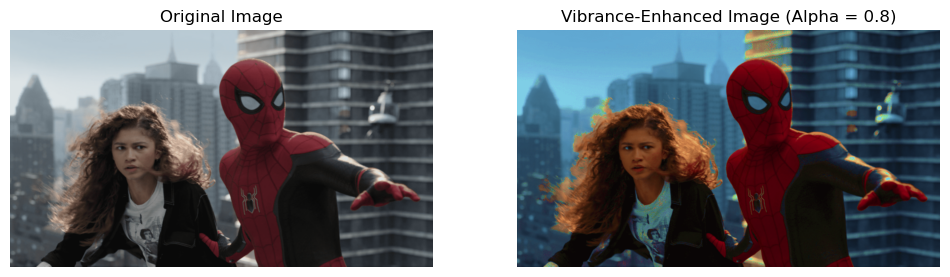

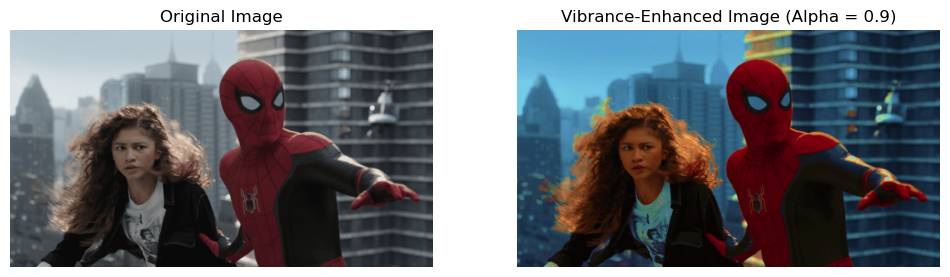

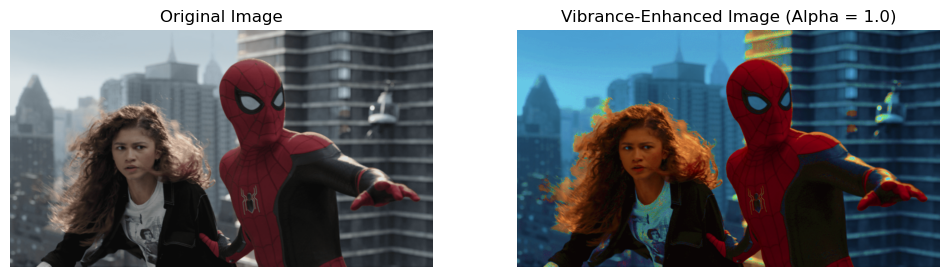

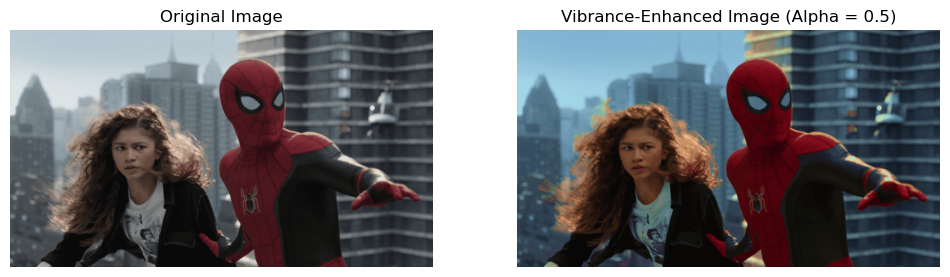

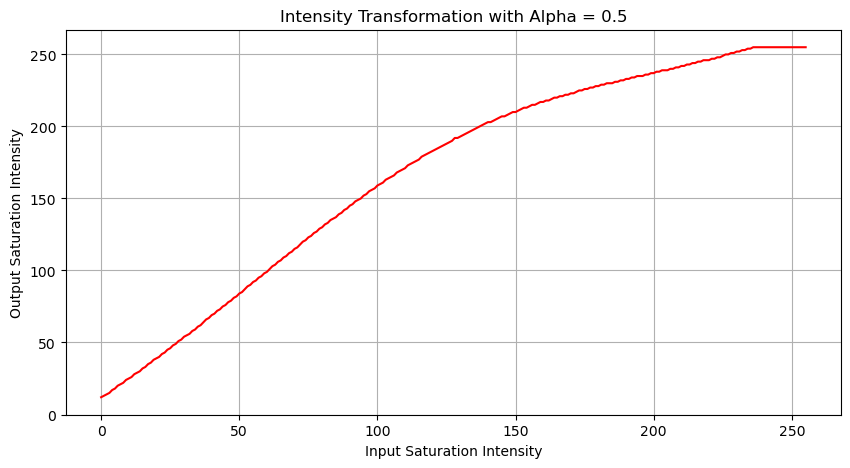

In [79]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('spider.png')
assert img is not None, "Error: Image not found!"

# Convert the image from BGR to HSV
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the HSV image into three channels: Hue, Saturation, and Value
h, s, v = cv.split(hsv_img)

# Define the vibrance enhancement function
def vibrance_transform(x, alpha, sigma=70):
    # Apply the vibrance intensity transformation function
    return np.clip(x + alpha * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)

alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in alpha:

    # Apply the vibrance transformation to the saturation channel
    s_vibrance_enhanced = vibrance_transform(s, i)

    # Recombine the H, modified S (saturation), and V channels
    hsv_vibrance_enhanced = cv.merge([h, s_vibrance_enhanced, v])

    # Convert the vibrance-enhanced HSV image back to BGR
    img_vibrance_enhanced = cv.cvtColor(hsv_vibrance_enhanced, cv.COLOR_HSV2BGR)
    
    # Display the original and vibrance-enhanced images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(cv.cvtColor(img_vibrance_enhanced, cv.COLOR_BGR2RGB))
    ax[1].set_title(f'Vibrance-Enhanced Image (Alpha = {i})')
    ax[1].axis('off')
    
    plt.show()
    
# Define the alpha value for vibrance enhancement
alpha = 0.5

# Apply the vibrance transformation to the saturation channel
s_vibrance_enhanced = vibrance_transform(s, alpha)

# Recombine the H, modified S (saturation), and V channels
hsv_vibrance_enhanced = cv.merge([h, s_vibrance_enhanced, v])

# Convert the vibrance-enhanced HSV image back to BGR
img_vibrance_enhanced = cv.cvtColor(hsv_vibrance_enhanced, cv.COLOR_HSV2BGR)

# Display the original and vibrance-enhanced images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_vibrance_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Vibrance-Enhanced Image (Alpha = {alpha})')
ax[1].axis('off')

plt.show()

# Plot the intensity transformation curve for reference
x_vals = np.arange(256)
y_vals = vibrance_transform(x_vals, alpha)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, color='red')
plt.title(f'Intensity Transformation with Alpha = {alpha}')
plt.xlabel('Input Saturation Intensity')
plt.ylabel('Output Saturation Intensity')
plt.grid(True)
plt.show()


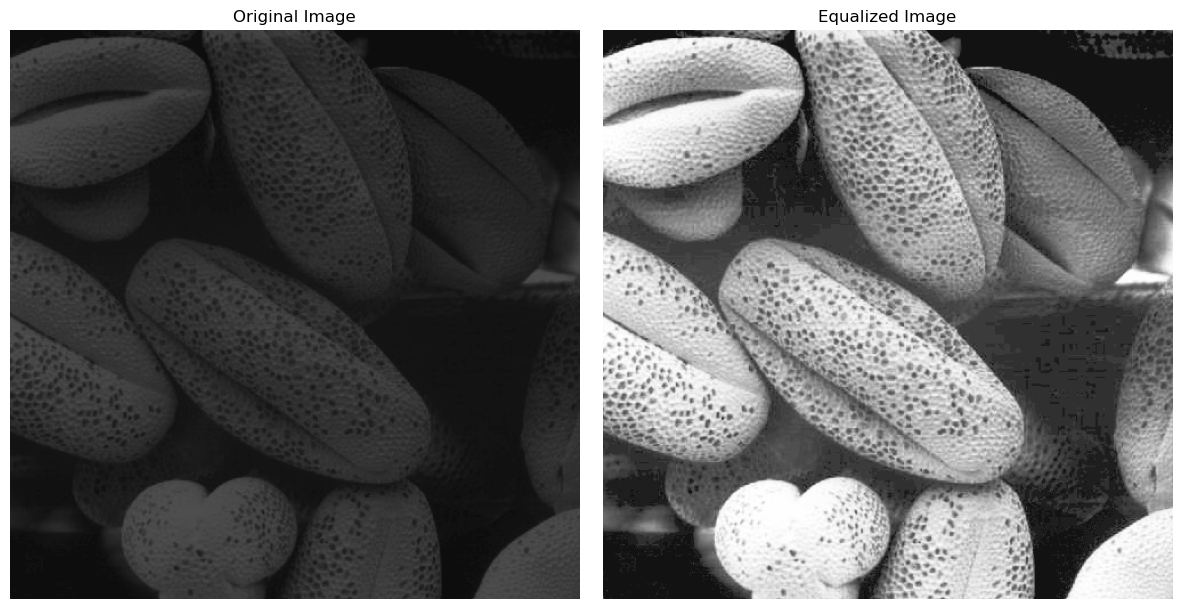

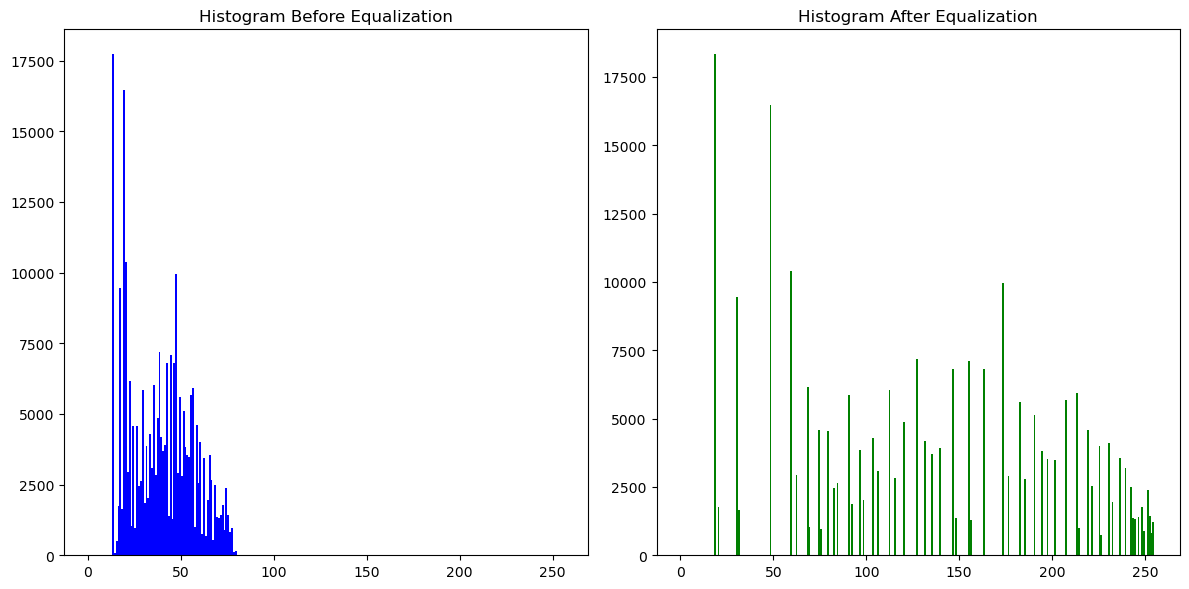

In [84]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
assert img is not None, "Error: Image not found!"

# Get the image dimensions
M, N = img.shape

# Compute the histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()

cdf_normalized = cdf * (255 / cdf.max())

L = 256  # Number of intensity levels
t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)], dtype=np.uint8)

# Map the original image pixels using the transformation array
img_equalized = t[img]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(img.flatten(), 256, [0, 256], color='blue')
ax[0].set_title('Histogram Before Equalization')

ax[1].hist(img_equalized.flatten(), 256, [0, 256], color='green')
ax[1].set_title('Histogram After Equalization')

plt.tight_layout()
plt.show()


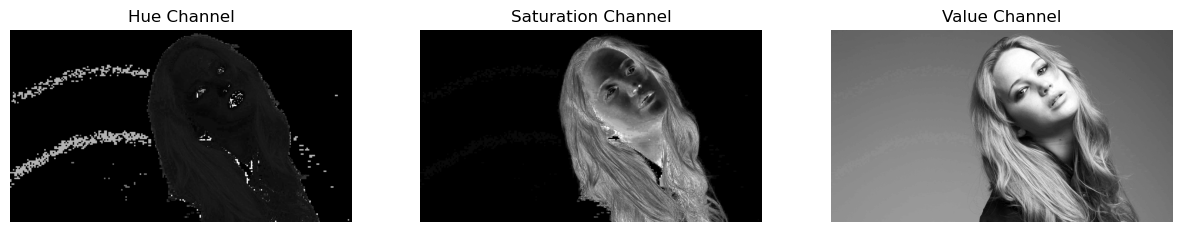

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = 'jeniffer.jpg'  
img = cv.imread(image_path)
assert img is not None, "Error: Image not found!"

# Convert the image from BGR to HSV color space
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value planes
hue, saturation, value = cv.split(hsv_img)

# Display the hue, saturation, and value planes in grayscale
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(hue, cmap='gray')
axes[0].set_title('Hue Channel')
axes[0].axis('off')

axes[1].imshow(saturation, cmap='gray')
axes[1].set_title('Saturation Channel')
axes[1].axis('off')

axes[2].imshow(value, cmap='gray')
axes[2].set_title('Value Channel')
axes[2].axis('off')

plt.show()


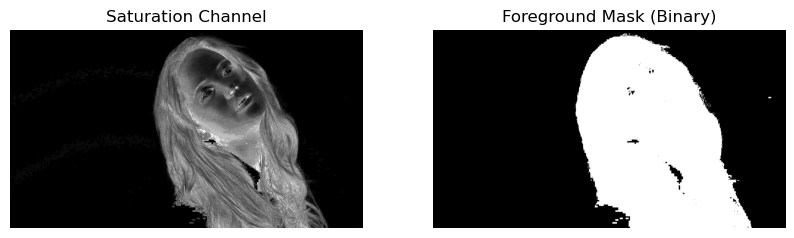

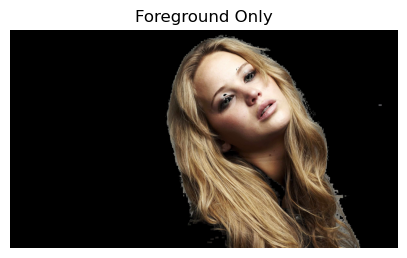

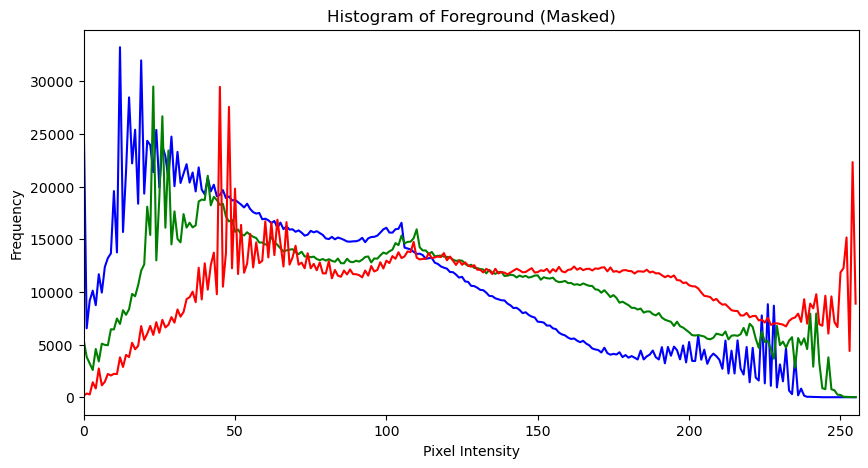

In [7]:
#Threshold the saturation plane to create the foreground mask
sat_threshold = 11  
_, foreground_mask = cv.threshold(saturation, sat_threshold, 255, cv.THRESH_BINARY)

# Display the saturation channel and the thresholded mask
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(saturation, cmap='gray')
axes[0].set_title('Saturation Channel')
axes[0].axis('off')

axes[1].imshow(foreground_mask, cmap='gray')
axes[1].set_title('Foreground Mask (Binary)')
axes[1].axis('off')

plt.show()

#Obtain the foreground only using cv.bitwise_and
foreground = cv.bitwise_and(img, img, mask=foreground_mask)

# Display the foreground image
plt.figure(figsize=(5, 5))
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground Only')
plt.axis('off')
plt.show()

# Compute the histogram for the foreground (using the masked area)
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    hist = cv.calcHist([foreground], [i], foreground_mask, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Histogram of Foreground (Masked)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


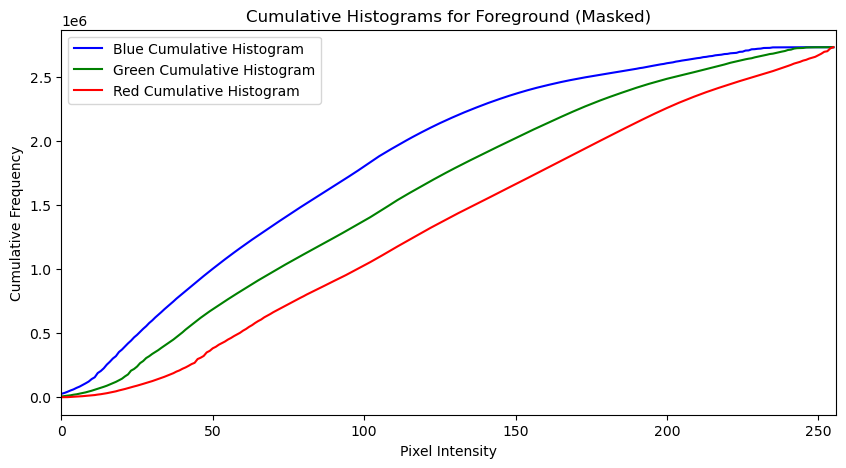

In [8]:
# Compute the histograms for each channel (blue, green, red) for the foreground
hist_b = cv.calcHist([foreground], [0], foreground_mask, [256], [0, 256])
hist_g = cv.calcHist([foreground], [1], foreground_mask, [256], [0, 256])
hist_r = cv.calcHist([foreground], [2], foreground_mask, [256], [0, 256])

# (d) Obtain the cumulative sum of each histogram using np.cumsum
cum_hist_b = np.cumsum(hist_b)
cum_hist_g = np.cumsum(hist_g)
cum_hist_r = np.cumsum(hist_r)

# Plot the cumulative histograms
plt.figure(figsize=(10, 5))

plt.plot(cum_hist_b, color='b', label='Blue Cumulative Histogram')
plt.plot(cum_hist_g, color='g', label='Green Cumulative Histogram')
plt.plot(cum_hist_r, color='r', label='Red Cumulative Histogram')

plt.title('Cumulative Histograms for Foreground (Masked)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.xlim([0, 256])
plt.show()


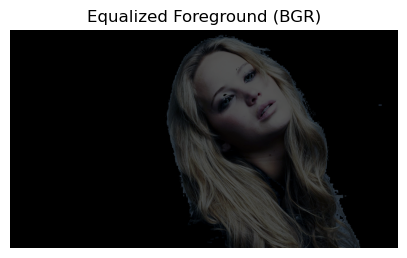

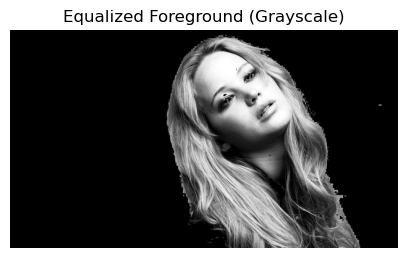

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Assuming the cumulative histograms (cum_hist_b, cum_hist_g, cum_hist_r) are already calculated

# Step 1: Compute the number of intensity levels
L = 256  # 8-bit image has 256 levels

# Step 2: Get the dimensions of the foreground image
M, N = foreground.shape[:2]  # Height (M) and width (N) of the image
total_pixels = M * N

# Step 3: Define the transformation function using the provided formula for each channel

# Blue channel
t_b = np.array([(L-1) / total_pixels * cum_hist_b[k] for k in range(L)], dtype=np.uint8)

# Green channel
t_g = np.array([(L-1) / total_pixels * cum_hist_g[k] for k in range(L)], dtype=np.uint8)

# Red channel
t_r = np.array([(L-1) / total_pixels * cum_hist_r[k] for k in range(L)], dtype=np.uint8)

# Step 4: Apply the transformation function to each channel in the foreground

# Extract each channel from the original foreground image
blue_channel = foreground[:, :, 0]
green_channel = foreground[:, :, 1]
red_channel = foreground[:, :, 2]

# Apply the equalization using the transformation function
equalized_b = t_b[blue_channel]
equalized_g = t_g[green_channel]
equalized_r = t_r[red_channel]

# Step 5: Merge the equalized channels back into a BGR image
equalized_foreground = cv.merge([equalized_b, equalized_g, equalized_r])

# Step 6: Display the equalized foreground image
plt.figure(figsize=(5, 5))
plt.imshow(cv.cvtColor(equalized_foreground, cv.COLOR_BGR2RGB))
plt.title('Equalized Foreground (BGR)')
plt.axis('off')
plt.show()

# Optional: Convert to grayscale and display if needed
equalized_foreground_gray = cv.cvtColor(equalized_foreground, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(5, 5))
plt.imshow(equalized_foreground_gray, cmap='gray')
plt.title('Equalized Foreground (Grayscale)')
plt.axis('off')
plt.show()


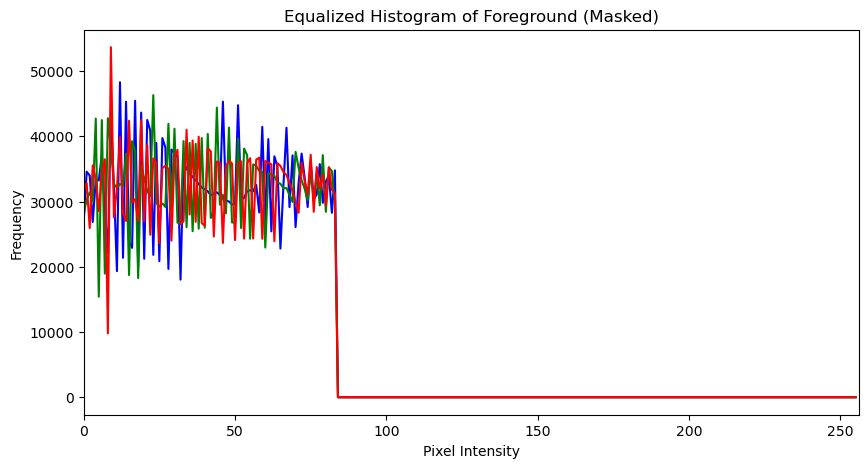

In [11]:
# Calculate and plot the histograms for the equalized foreground image
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))

for i, color in enumerate(colors):
    # Calculate the histogram for each channel (i = 0 for blue, 1 for green, 2 for red)
    hist = cv.calcHist([equalized_foreground], [i], foreground_mask, [256], [0, 256])
    
    # Plot the histogram
    plt.plot(hist, color=color)

# Set the limits, labels, and title
plt.xlim([0, 256])
plt.title('Equalized Histogram of Foreground (Masked)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
image_path = 'jeniffer.jpg'  
img = cv.imread(image_path)
assert img is not None, "Error: Image not found!"

# Convert the image from BGR to HSV color space
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value planes
hue, saturation, value = cv.split(hsv_img)

# Display the hue, saturation, and value planes in grayscale
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(hue, cmap='gray')
axes[0].set_title('Hue Channel')
axes[0].axis('off')

axes[1].imshow(saturation, cmap='gray')
axes[1].set_title('Saturation Channel')
axes[1].axis('off')

axes[2].imshow(value, cmap='gray')
axes[2].set_title('Value Channel')
axes[2].axis('off')

plt.show()


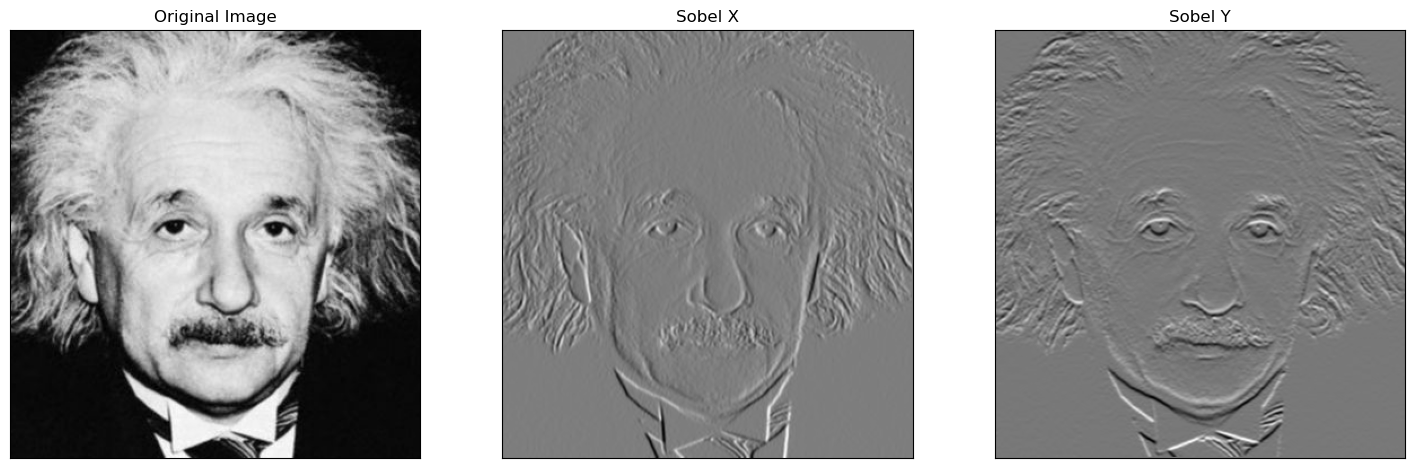

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale
image_path = 'einstein.png'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Define Sobel kernels for x and y direction
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply Sobel filter using filter2D for both x and y directions
im_x = cv.filter2D(img, cv.CV_64F, sobel_x)
im_y = cv.filter2D(img, cv.CV_64F, sobel_y)

# Plot the original image and Sobel filtered images
fig, ax = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(18, 9))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(im_x, cmap='gray')
ax[1].set_title('Sobel X')
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(im_y, cmap='gray')
ax[2].set_title('Sobel Y')
ax[2].set_xticks([]), ax[2].set_yticks([])

plt.show()


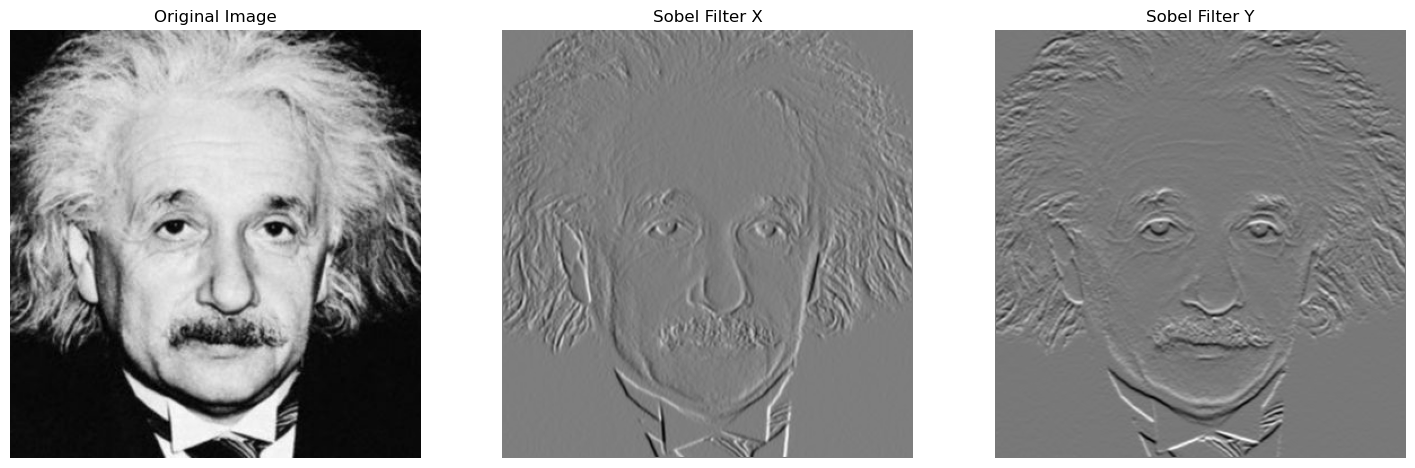

In [24]:
# Create empty images to store the results
sobel_x_result = np.zeros_like(img, dtype=np.float32)
sobel_y_result = np.zeros_like(img, dtype=np.float32)

# Apply Sobel filter manually
for i in range(1, height-1):
    for j in range(1, width-1):
        # Get the 3x3 region of interest
        region = img[i-1:i+2, j-1:j+2]

        # Apply the Sobel x and y kernels
        gx = np.sum(sobel_x * region)
        gy = np.sum(sobel_y * region)

        # Store the result in the corresponding result arrays
        sobel_x_result[i, j] = gx
        sobel_y_result[i, j] = gy

# Normalize the results to the range [0, 255]
sobel_x_result = cv.normalize(sobel_x_result, None, 0, 255, cv.NORM_MINMAX)
sobel_y_result = cv.normalize(sobel_y_result, None, 0, 255, cv.NORM_MINMAX)

# Plot the original and Sobel filtered images
fig, ax = plt.subplots(1, 3, figsize=(18, 9))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(sobel_x_result, cmap='gray')
ax[1].set_title('Sobel Filter X')
ax[1].axis('off')

ax[2].imshow(sobel_y_result, cmap='gray')
ax[2].set_title('Sobel Filter Y')
ax[2].axis('off')

plt.show()


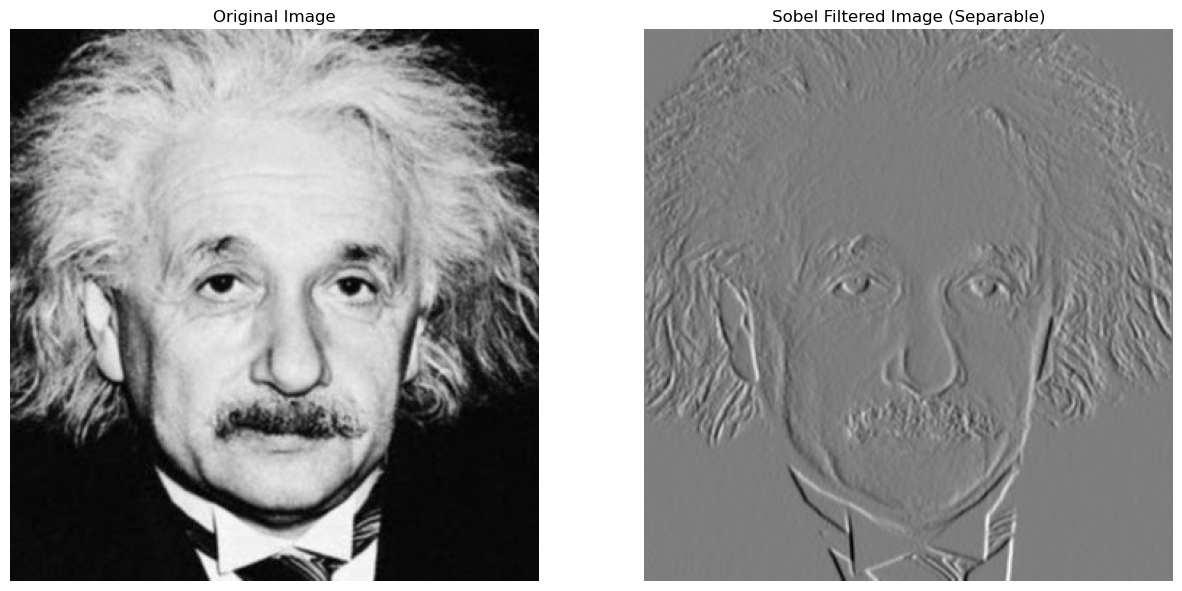

In [26]:
sobel_col = np.array([[1], [2], [1]])  # Column filter
sobel_row = np.array([[1, 0, -1]])     # Row filter

# Apply the column filter first (vertical direction)
im_col = cv.filter2D(img, cv.CV_64F, sobel_col)

# Then apply the row filter (horizontal direction)
sobel_filtered = cv.filter2D(im_col, cv.CV_64F, sobel_row)

# Plot the original and Sobel filtered images
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(sobel_filtered, cmap='gray')
ax[1].set_title('Sobel Filtered Image (Separable)')
ax[1].axis('off')

plt.show()
